# Davide Vaccari 
## [dv2438]
# Machine Learning Homework #4

___
# Part 1: Build a classification model using text data

In part one of the homework, you will solve a text classification task.

You can download the following data-sets from the HW data folder on the course website:

HW4_Text_train_data.csv and HW4_text_test_data.csv

The data consists of Women’s fashion online shop reviews, consisting of a review
text, and whether the review author would recommend the product.

We are trying to determine whether a reviewer will recommend a product or not based on each review.


In a real application this might allow us to find out what is good or bad about certain products or to feature more typical reviews (like a very critical and a very positive one).

Use cross-validation to evaluate the results. Use a metric that’s appropriate for imbalanced classification (AUC or average precision for example), and inspect all models by visualizing the coefficients.

To complete part one of the homework do the following:

**Import the text data, vectorize the review column into an X matrix.  Then run at least three models and select a single best model.  Note that you can also create three models that simply use different types of explanatory variables such as a logistic regression with different n grams or different tokenizers.  Be sure to explain your choice and evaluate this model using the test set.**

___

Setup code:

In [147]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

___
### Importing the data

In [148]:
text_train = pd.read_csv("/content/HW4_Text_train_data.csv")
text_test = pd.read_csv("/content/HW4_Text_test_data.csv")

print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("type of text_test: {}".format(type(text_test)))
print("length of text_test: {}".format(len(text_test)))

type of text_train: <class 'pandas.core.frame.DataFrame'>
length of text_train: 16985
type of text_test: <class 'pandas.core.frame.DataFrame'>
length of text_test: 5657


In [149]:
print("Fist five rows of text_train: \n{}".format(text_train.head()))

Fist five rows of text_train: 
                                              Review  Recommended
0  "go to" please offer a maxi for mature custome...            1
1  "go to" tee for sz 10+ women.Women who want so...            1
2  "long and warm".These leg warmers are perfect ...            1
3  "tweed" dress.I bought this dress for my siste...            1
4  #1 stunna.I am in lust with this fabulous dres...            1


In [150]:
print("Fist five rows of text_test: \n{}".format(text_test.head()))

Fist five rows of text_test: 
                                              Review  Recommended
0  "beach business".Great for the beachy business...            1
1  "formal pajamas".These are super comfy and so ...            1
2  "perfect with jeans".Great with leggings.perfe...            1
3  "won't stretch" tags are misleading.The tag on...            1
4  $200 piece of polyester.A $200 piece of polyes...            0


In [151]:
text_train.columns

Index(['Review', 'Recommended'], dtype='object')

In [152]:
text_train['Recommended'].value_counts()

1    13910
0     3075
Name: Recommended, dtype: int64

In [153]:
text_test['Recommended'].value_counts()

1    4631
0    1026
Name: Recommended, dtype: int64

In [154]:
y_test = np.array(text_test['Recommended'])
y_test

array([1, 1, 1, ..., 0, 1, 0])

___

## First Model

A simple bag of words model with all the arguments of CountVectorizer set to default, and logistic regression.

In [155]:
vect = CountVectorizer().fit(text_train.Review)
X_train = vect.transform(text_train.Review)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<16985x13010 sparse matrix of type '<class 'numpy.int64'>'
	with 749166 stored elements in Compressed Sparse Row format>


We have 16,985 documents (reviews) and 13,010 words in total.

In [156]:
(749166/(16985*13010))*100

0.33902772193306163

Only the 0.33% of the matrix has non zero values. The matrix is very sparse.

In [157]:
X_test = vect.transform(text_test.Review)
print("X_test:\n{}".format(repr(X_test)))

X_test:
<5657x13010 sparse matrix of type '<class 'numpy.int64'>'
	with 248933 stored elements in Compressed Sparse Row format>


In [158]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [159]:
dict(list(vect.vocabulary_.items())[0:10])

{'customers': 3136,
 'for': 4771,
 'go': 5113,
 'mature': 7006,
 'maxi': 7015,
 'offer': 7770,
 'please': 8473,
 'silhouette': 10191,
 'to': 11668,
 'transcends': 11776}

In [160]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 13010
First 20 features:
['00', '000', '00p', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0xs', '10', '100', '1000', '100lb', '100lbs', '102', '102lbs']
Features 210 to 230:
['1st', '1x', '20', '200', '2000s', '2001', '2004', '2005', '2006', '2007', '2008', '2010', '2012', '2013', '2015', '2016', '2035', '20lb', '20lbs', '20s']
Every 200th feature:
['00', '1970', '56', 'actualyl', 'altar', 'area', 'awsome', 'beforehand', 'blossoms', 'breastfeeding', 'buttoning', 'cedar', 'circle', 'combat', 'constructed', 'cream', 'darkler', 'designed', 'dissapointing', 'dropped', 'embroiderer', 'excellently', 'fashioned', 'flaring', 'former', 'gauze', 'graphic', 'havne', 'hoodie', 'imperfection', 'interfered', 'july', 'las', 'limiting', 'lucky', 'matte', 'minor', 'mum', 'nimble', 'ombrã', 'overtime', 'peek', 'pinstripe', 'possessing', 'promised', 'rail', 'regualr', 'retailerpolog', 'rt', 'scratches', 'shapewear', 'sill', 'slumpy', 'spaghetti', 'steaming', 'stunn

In [161]:
y_train = np.array(text_train['Recommended'])

print(X_train.shape)
print(y_train.shape)

(16985, 13010)
(16985,)


In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.89


In [163]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5).fit(X_train, y_train)

y_pred1 = grid.predict(X_test)

In [164]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: ", grid.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred1))

Best cross-validation score: 0.90
Test score: 0.90
Best parameters:  {'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1026
           1       0.93      0.95      0.94      4631

    accuracy                           0.90      5657
   macro avg       0.84      0.80      0.82      5657
weighted avg       0.90      0.90      0.90      5657



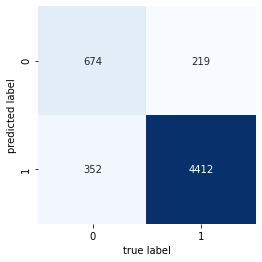

In [165]:
mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

**Note**: We have a pretty bad precision and recall for "not recommended" reviews. We're getting the right prediction for that label around 2/3 of the time.

### Visualization of coefficients

In [166]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

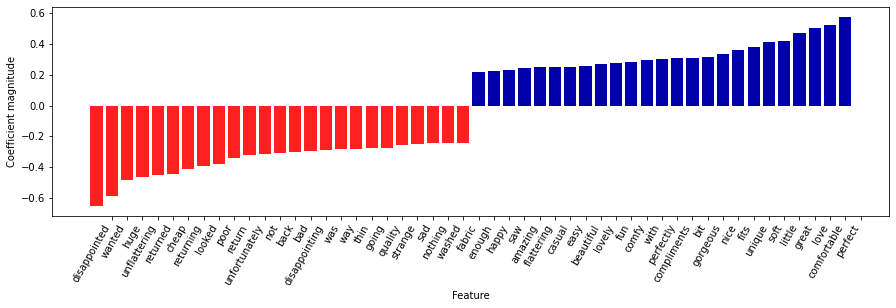

In [167]:
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

___

## Second Model

A more complex model. First of all, I'm going to use TfidfTransformer instead of CountVectorizer. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Then I'm going to change ngram_range from (1, 1) [default] to (1, 2) meaning that I'm going to analyze unigrams and bigrams. Since my matrix is going to become much bigger, I'm also going to use stop_words and take words that appear at least in two documents.


In [168]:
vect = TfidfVectorizer(ngram_range= (1,2), stop_words="english", min_df=2).fit(text_train.Review)
X_train = vect.transform(text_train.Review)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<16985x58529 sparse matrix of type '<class 'numpy.float64'>'
	with 701906 stored elements in Compressed Sparse Row format>


In [169]:
(701906/(16985*58529))*100

0.07060611238197059

Only the 0.07% of the matrix has non zero values. The matrix is very sparse. Much more than the previous one.

In [170]:
X_test = vect.transform(text_test.Review)
print("X_test:\n{}".format(repr(X_test)))

X_test:
<5657x58529 sparse matrix of type '<class 'numpy.float64'>'
	with 217637 stored elements in Compressed Sparse Row format>


In [171]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 58529
First 20 features:
['00', '00 based', '00 big', '00 dress', '00 fits', '00 petite', '00 regular', '00 size', '00 sold', '00 usually', '00 xxs', '00p', '00p 0p', '00p fit', '00p large', '00p retailer', '03', '0p', '0p 00p', '0p 2p']
Features 210 to 230:
['116', '116 lbs', '116 pounds', '116lbs', '117', '117 34b', '117 lbs', '117 petite', '117 pounds', '117lbs', '117lbs ordered', '118', '118 34d', '118 lbs', '118 pounds', '118lb', '118lbs', '119', '119 lbs', '11inches']
Every 200th feature:
['00', '115 pounds', '135lbs curvy', '25 petite', '32 ddd', '36 hip', '70 style', 'according instructions', 'additional 40', 'aesthetic', 'alternative shorts', 'appear larger', 'aren navy', 'arrived fabric', 'available try', 'bad probably', 'basic beautiful', 'beautiful fall', 'beautiful wanted', 'belt pants', 'better say', 'big opinion', 'bit bulky', 'bit washing', 'black underwear', 'blouse soft', 'board', 'boobs spilling', 'bought fabulous', 'boxy drapes', 'bra unless', 'b

In [172]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5).fit(X_train, y_train)

y_pred = grid.predict(X_test)

In [173]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: ", grid.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best cross-validation score: 0.90
Test score: 0.90
Best parameters:  {'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1026
           1       0.92      0.96      0.94      4631

    accuracy                           0.90      5657
   macro avg       0.86      0.80      0.82      5657
weighted avg       0.90      0.90      0.90      5657



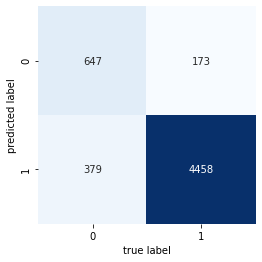

In [174]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

**Note**: Despite being more complex, this model has the same f1-score of the previous one. The 0 label (not recommended) is clearly the hardest to corretly forecast, being also the minority target variable. The model does a little better on precision than the previous one. However, it does worse on recall. Overall, the previous model is better, being also lighter.

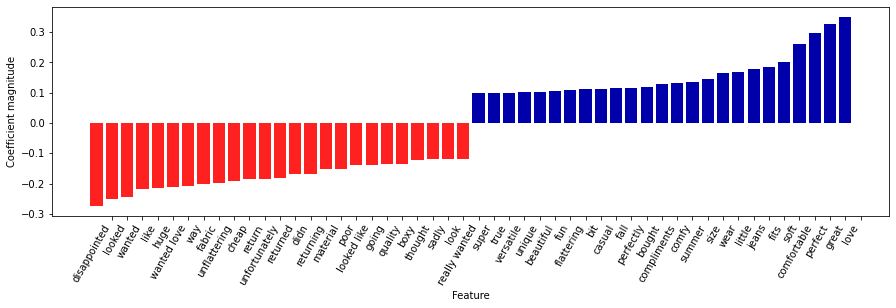

In [175]:
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

___

## Third Model (s)

Here I want to use stemming and lemmatization. Moreover, I tried Random Forest and KNN besides the usual logistic regression. Also, I increased the cross validation to 10 (stratified k-fold, default for binary and multiclass).

In [176]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [177]:
import nltk

# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 


class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
# define a count vectorizer with the custom tokenizer

lemma_vect = TfidfVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1, 1), stop_words="english", min_df=3).fit(text_train.Review)

X_train = lemma_vect.transform(text_train.Review)
print("X_train:\n{}".format(repr(X_train)))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


X_train:
<16985x6147 sparse matrix of type '<class 'numpy.float64'>'
	with 486951 stored elements in Compressed Sparse Row format>


In [178]:
X_test = lemma_vect.transform(text_test.Review)
print("X_test:\n{}".format(repr(X_test)))

X_test:
<5657x6147 sparse matrix of type '<class 'numpy.float64'>'
	with 161593 stored elements in Compressed Sparse Row format>


In [179]:
feature_names = lemma_vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[2100:2130]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 6147
First 20 features:
['!', '#', '$', '%', '&', "'", "''", "'d", "'em", "'ll", "'m", "'re", "'red", "'s", "'t", "'ve", '(', ')', '+', ',']
Features 210 to 230:
['environment', 'envision', 'envisioned', 'epaulet', 'epitome', 'eptite', 'equal', 'equally', 'equivalent', 'er', 'errand', 'error', 'esp', 'espadrille', 'especially', 'essential', 'essentially', 'etc.', 'ethereal', 'europe', 'european', 'eva', 'eve', 'evening', 'evenly', 'event', 'eventually', 'ever.i', 'ever.these', 'ever.this']
Every 200th feature:
['!', '11', '38c', 'agreed', 'backorder', 'book', 'careful', 'color.love', 'creates', 'detailed', 'durability', 'f', 'flow-y', 'gorgeous', 'hoodie', 'italy', 'let', 'marled', 'na', 'overlooked', 'pinning', 'provide', 'renaissance', 'saw', 'significantly', 'sparkly', 'stylist', 'tee.very', 'transitioning', 'user', 'wi']


In [180]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {'n_estimators': np.arange(2, 20, 2)}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=10).fit(X_train, y_train)

y_pred = rf_grid.predict(X_test)

In [181]:
print("Best cross-validation score: {:.2f}".format(rf_grid.best_score_))
print("Test score: {:.2f}".format(rf_grid.score(X_test, y_test)))
print("Best parameters: ", rf_grid.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best cross-validation score: 0.86
Test score: 0.86
Best parameters:  {'n_estimators': 16}
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.38      0.50      1026
           1       0.88      0.97      0.92      4631

    accuracy                           0.86      5657
   macro avg       0.80      0.67      0.71      5657
weighted avg       0.85      0.86      0.84      5657



In [182]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10)
model = grid.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [183]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: ", grid.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best cross-validation score: 0.89
Test score: 0.89
Best parameters:  {'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1026
           1       0.92      0.95      0.93      4631

    accuracy                           0.89      5657
   macro avg       0.82      0.78      0.80      5657
weighted avg       0.88      0.89      0.89      5657



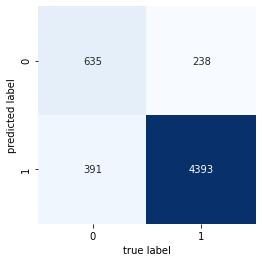

In [184]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

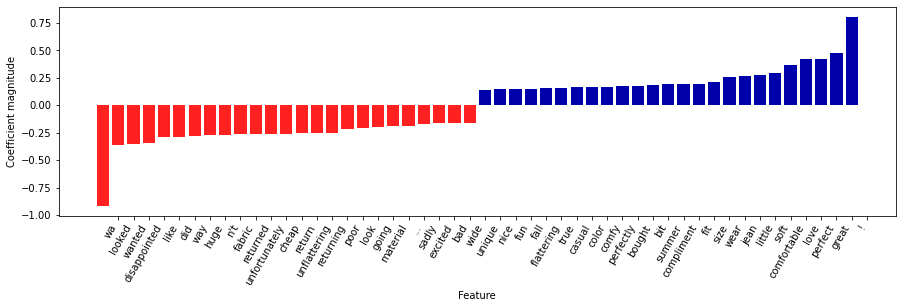

In [185]:
coefs = LogisticRegression(C=0.01).fit(X_train,y_train).coef_
feature_names = lemma_vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=25)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {'n_neighbors': range(1, 9, 2)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10).fit(X_train, y_train)

y_pred = knn_grid.predict(X_test)

In [187]:
print("Best cross-validation score: {:.2f}".format(knn_grid.best_score_))
print("Test score: {:.2f}".format(knn_grid.score(X_test, y_test)))
print("Best parameters: ", knn_grid.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best cross-validation score: 0.86
Test score: 0.85
Best parameters:  {'n_neighbors': 7}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.34      0.46      1026
           1       0.87      0.97      0.92      4631

    accuracy                           0.85      5657
   macro avg       0.79      0.65      0.69      5657
weighted avg       0.84      0.85      0.83      5657



**Notes**: RF and KNN do terrible for recall, getting the right prediction for the 0 label just ≈ 1/3 of the time. Logistic regression does better than the other two, however is still worse than the first model.

## Final answer for the first part

The best model, of those I ran, is the first one. It is also the simplest one. Nonetheless, the recall is bad and is not a great model. Below there are its metrics.

In [188]:
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1026
           1       0.93      0.95      0.94      4631

    accuracy                           0.90      5657
   macro avg       0.84      0.80      0.82      5657
weighted avg       0.90      0.90      0.90      5657

